In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
ndata=pd.read_csv("C:/Users/User/Downloads/of.csv")

   The following are the features
   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

In [3]:
ndata.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [4]:
ndata.isnull().any()

X        False
Y        False
month    False
day      False
FFMC     False
DMC      False
DC       False
ISI      False
temp     False
RH       False
wind     False
rain     False
area     False
dtype: bool

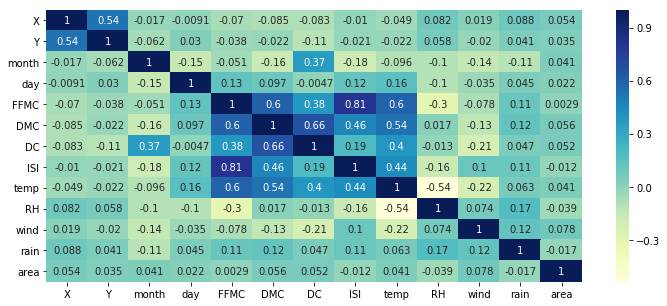

In [7]:
fig, ax = plt.subplots(figsize=(12,5))

sns.heatmap(ndata.corr(),annot = True,cmap="YlGnBu");

In [8]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
colu=['month','day']
for col in colu:
    ndata[col] = le.fit_transform(ndata[col])
from sklearn.preprocessing import scale
colu=['FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']

for col in colu:
    ndata[col] = le.fit_transform(ndata[col])

In [9]:
ndata.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,28,37,41,29,12,34,14,0,0
1,7,4,10,5,56,49,144,42,85,16,1,0,0
2,7,4,10,2,56,56,156,42,55,16,2,0,0
3,8,6,7,0,67,48,33,64,13,72,8,1,0
4,8,6,7,3,46,66,46,68,30,73,3,0,0
5,8,6,1,3,73,93,91,102,125,12,11,0,0
6,8,6,1,1,73,98,92,59,144,10,6,0,0
7,8,6,1,1,65,167,118,76,11,66,4,0,0
8,8,6,11,5,60,149,161,44,42,46,11,0,0
9,7,5,11,2,75,95,164,45,131,23,8,0,0


In [36]:
X = ndata.iloc[:, 0:12].values
y = ndata.iloc[:, 12].values
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.2692307692307692

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10,oob_score=True ,random_state =42, min_samples_split=25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.4230769230769231

In [38]:
from sklearn.svm import SVC
clf = SVC(random_state = 100, kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.41346153846153844

In [39]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.00001)
log.fit(X_train,y_train)
y_pred = log.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.4230769230769231

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
predictions = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
accuracy



0.40384615384615385

In [42]:
n_neighbors = np.arange(3, 10, 1)
n_neighbors
accuracies = []
for n in n_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=n)
    knn_clf.fit(X_train, y_train)
    predictions = knn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
accuracies

[0.36538461538461536,
 0.40384615384615385,
 0.40384615384615385,
 0.41346153846153844,
 0.4230769230769231,
 0.4230769230769231,
 0.4230769230769231]

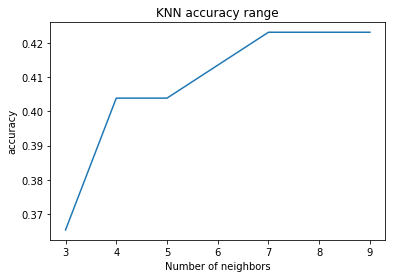

In [43]:
plt.title('KNN accuracy range')
plt.xlabel('Number of neighbors')
plt.ylabel('accuracy')
plt.plot(n_neighbors, accuracies)
plt.show()

### As you can see Logistic regression gives the best accuracy along with Knn having 7-9 neighbours

In [30]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
log=LogisticRegression(penalty='l2',C=.00001)
log.fit(X_train,y_train)
y_pred = log.predict(X_test1)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test1, y_pred)
accuracy

0.5421686746987951

### This shows that the given data set has a lot of bias and hence the model is underfitting and the no. of samples is just 517

Perform cross validation

In [15]:
from sklearn.model_selection import KFold
kfold = KFold(3, True, 1)

In [16]:

for train, test in kfold.split(X):
    print('train: %s, test: %s' % (X[train],X[test]))
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]
    

train: [[ 28  37  41 ...  34  14   0]
 [ 56  49 144 ...  16   1   0]
 [ 56  56 156 ...  16   2   0]
 ...
 [  9  71 141 ...  54  12   0]
 [ 92 168 122 ...  25   8   0]
 [  7   2  48 ...  14   9   0]], test: [[ 46  66  46 ...  73   3   0]
 [ 73  93  91 ...  12  11   0]
 [ 73  98  92 ...  10   6   0]
 ...
 [ 60 181 196 ...  54  16   5]
 [  9  71 141 ...  15   5   0]
 [  9  71 141 ...  53  14   0]]
train: [[ 56  49 144 ...  16   1   0]
 [ 56  56 156 ...  16   2   0]
 [ 67  48  33 ...  72   8   1]
 ...
 [  9  71 141 ...  18   5   0]
 [  9  71 141 ...  15   5   0]
 [  9  71 141 ...  53  14   0]], test: [[ 28  37  41 ...  34  14   0]
 [ 60 149 161 ...  46  11   0]
 [ 75  95 164 ...  23   8   0]
 ...
 [  9  71 141 ...  54  12   0]
 [ 92 168 122 ...  25   8   0]
 [  7   2  48 ...  14   9   0]]
train: [[ 28  37  41 ...  34  14   0]
 [ 46  66  46 ...  73   3   0]
 [ 73  93  91 ...  12  11   0]
 ...
 [  9  71 141 ...  53  14   0]
 [ 92 168 122 ...  25   8   0]
 [  7   2  48 ...  14   9   0]], test

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.3546511627906977

In [18]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1 = sqrt(mean_squared_error(y_test, y_pred))
rmse1


90.85732029965932

In [261]:
ndata.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,28,37,41,29,12,34,14,0,0
1,7,4,10,5,56,49,144,42,85,16,1,0,0
2,7,4,10,2,56,56,156,42,55,16,2,0,0
3,8,6,7,0,67,48,33,64,13,72,8,1,0
4,8,6,7,3,46,66,46,68,30,73,3,0,0
